In [7]:
# Mengimpor pustaka yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Pengaturan tampilan grafis
%matplotlib inline
sns.set(style="whitegrid")

# Membuat data sintetis
X, y = make_classification(n_samples=1000,    # Jumlah sampel
                           n_features=20,     # Jumlah fitur
                           n_informative=2,   # Jumlah fitur informatif
                           n_redundant=2,     # Jumlah fitur redundan
                           n_classes=2,       # Jumlah kelas
                           random_state=42)

# Mengonversi data ke DataFrame untuk kemudahan manipulasi
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y

# Menampilkan beberapa baris pertama dari dataset
df.head()


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target
0,-0.669356,-1.495778,-0.870766,1.141831,0.021606,1.730630,-1.251698,0.289305,0.357163,-0.196811,...,0.154850,-0.219970,-0.739137,1.802012,1.634606,-0.938180,-1.267337,-1.276334,1.016643,1
1,0.093372,0.785848,0.105754,1.272354,-0.846316,-0.979093,1.263707,0.264020,2.411677,-0.960046,...,0.199810,0.288724,0.732492,-0.872002,-1.654887,-1.130204,-0.122709,0.693431,0.911363,0
2,-0.905797,-0.608341,0.295141,0.943716,0.092936,1.370397,-0.064772,0.287273,-0.533004,-0.032504,...,-0.510064,-0.868768,-0.598279,0.019832,0.613460,-1.779439,0.830498,-0.737332,-0.578212,1
3,-0.585793,0.389279,0.698816,0.436236,-0.315082,0.459505,1.448820,0.505558,-1.440982,-1.134020,...,1.466783,0.678728,-1.190917,-1.442381,-0.929136,-0.221600,-0.346772,0.034246,-1.040199,1
4,1.146441,0.515579,-1.222895,-0.396230,-1.293508,-0.352428,0.071254,1.239584,1.007133,-1.479444,...,-0.918127,0.604121,1.068379,-0.882271,2.303639,-0.973379,1.259233,0.360015,1.920368,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   1000 non-null   float64
 1   feature_1   1000 non-null   float64
 2   feature_2   1000 non-null   float64
 3   feature_3   1000 non-null   float64
 4   feature_4   1000 non-null   float64
 5   feature_5   1000 non-null   float64
 6   feature_6   1000 non-null   float64
 7   feature_7   1000 non-null   float64
 8   feature_8   1000 non-null   float64
 9   feature_9   1000 non-null   float64
 10  feature_10  1000 non-null   float64
 11  feature_11  1000 non-null   float64
 12  feature_12  1000 non-null   float64
 13  feature_13  1000 non-null   float64
 14  feature_14  1000 non-null   float64
 15  feature_15  1000 non-null   float64
 16  feature_16  1000 non-null   float64
 17  feature_17  1000 non-null   float64
 18  feature_18  1000 non-null   float64
 19  feature_19  1000 non-null   

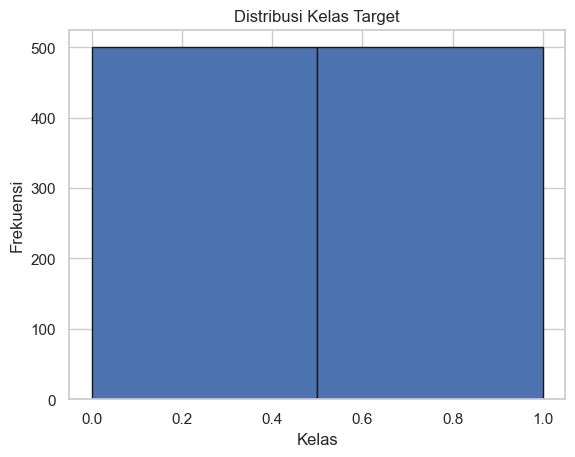

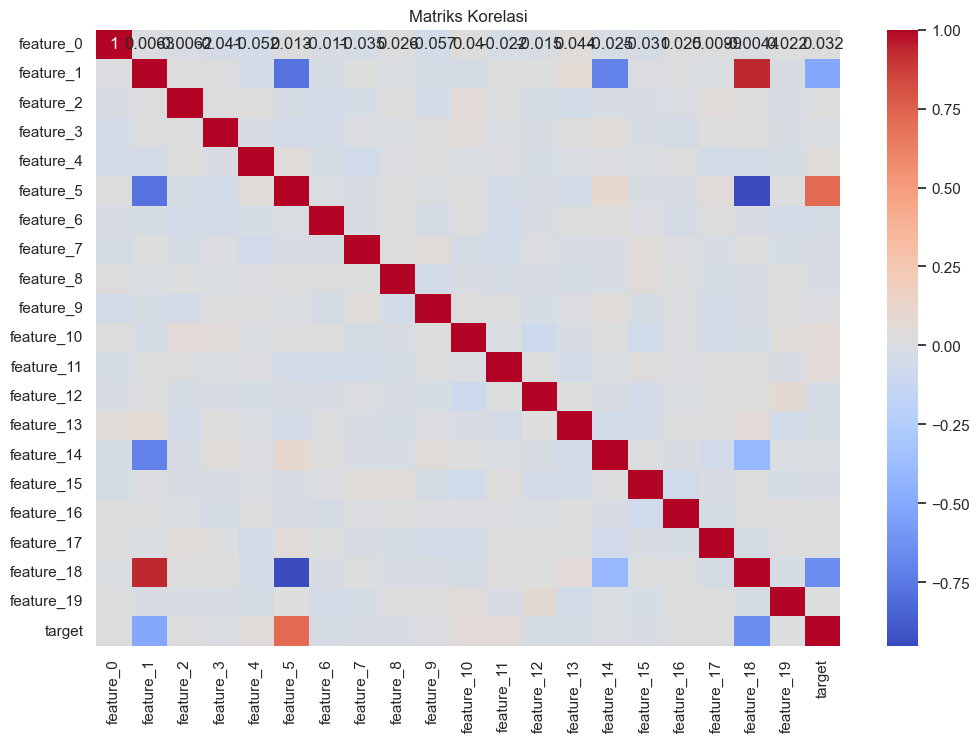

In [8]:
# Informasi dasar tentang dataset
df.info()

# Statistik deskriptif
df.describe()

# Distribusi target
plt.hist(df['target'], bins=2, edgecolor='k')
plt.xlabel('Kelas')
plt.ylabel('Frekuensi')
plt.title('Distribusi Kelas Target')
plt.show()

# Matriks korelasi untuk melihat hubungan antar fitur
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()


In [9]:
# Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))

# Mengonversi kembali ke DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=[f'feature_{i}' for i in range(X_scaled.shape[1])])
df_scaled['target'] = df['target']

# Memastikan data sudah di-preprocess dengan benar
df_scaled.head()


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target
0,-0.646135,-1.776834,-0.908403,1.068801,0.063066,1.249364,-1.205809,0.219675,0.418507,-0.207797,...,0.138345,-0.222704,-0.707288,1.400287,1.574097,-0.960952,-1.234425,-1.587161,1.001341,1
1,0.099448,0.880733,0.081520,1.197237,-0.792720,-0.681664,1.234647,0.194748,2.577197,-0.975455,...,0.184544,0.296930,0.776231,-0.623219,-1.603522,-1.149930,-0.101471,0.821770,0.898199,0
2,-0.877261,-0.743175,0.273506,0.873854,0.133399,0.992652,-0.054249,0.217671,-0.516796,-0.042537,...,-0.544905,-0.885454,-0.565293,0.051658,0.587681,-1.788865,0.842014,-0.927986,-0.561124,1
3,-0.564450,0.418822,0.682721,0.374489,-0.268914,0.343523,1.414245,0.432870,-1.470814,-1.150438,...,1.486454,0.695322,-1.162719,-1.054842,-0.902453,-0.255740,-0.323249,0.015618,-1.013729,1
4,1.128844,0.565932,-1.265364,-0.444665,-1.233659,-0.235084,0.077724,1.156517,1.101435,-1.497864,...,-0.964221,0.619110,1.114832,-0.630990,2.220377,-0.995593,1.266376,0.414018,1.886711,0


In [10]:
# Memisahkan fitur dan target
X = df_scaled.drop('target', axis=1)
y = df_scaled['target']

# Membagi data menjadi training dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Membuat prediksi
y_pred = rf.predict(X_test)


In [11]:
# Evaluasi model
print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Akurasi:', accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        93
           1       0.95      0.86      0.90       107

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200

Akurasi: 0.9


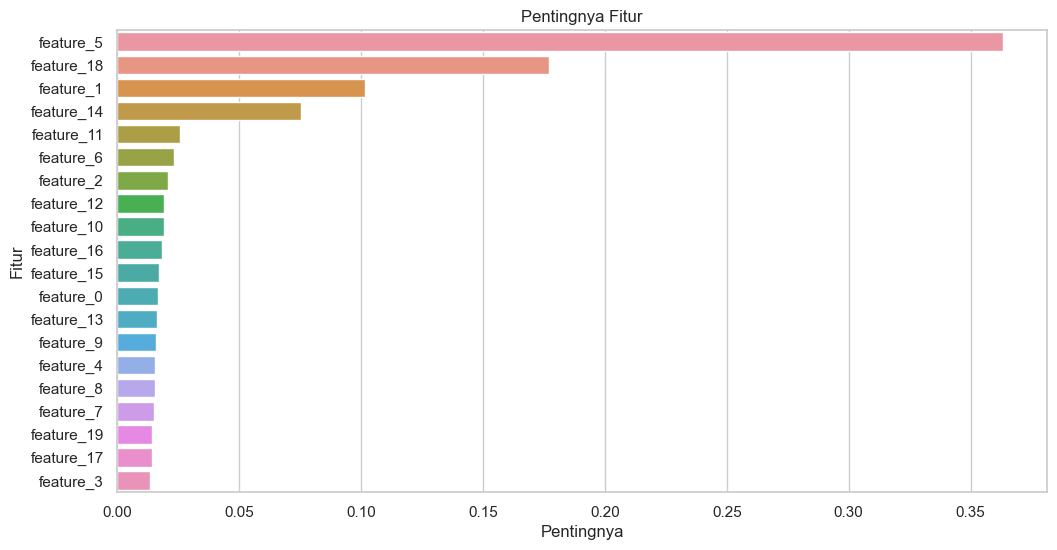

In [12]:
# Visualisasi pentingnya fitur
importances = rf.feature_importances_
feature_names = X.columns

# Membuat dataframe untuk memudahkan visualisasi
feature_importance_df = pd.DataFrame({
    'Fitur': feature_names,
    'Pentingnya': importances
}).sort_values(by='Pentingnya', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Pentingnya', y='Fitur', data=feature_importance_df)
plt.title('Pentingnya Fitur')
plt.show()
